In [2]:
def WageGrowthTracker() -> str:
    """
    Returns a link to solutions on GitHub.
    """
    return "https://www.atlantafed.org/chcs/wage-growth-tracker"

print(WageGrowthTracker())


https://www.atlantafed.org/chcs/wage-growth-tracker


In [3]:
import requests
import pandas as pd
import datetime as dt
import numpy as np

# Just for jupyter notebook - so I can avoid having to see big warning
#   Note: if you want to disable and see warnings, see Zach's cells Q1 and 
#   comment out 'warnings.filterwarnings('ignore')'
import warnings

In [4]:
# Download and save the Excel file
url = 'https://www.atlantafed.org/-/media/documents/datafiles/chcs/wage-growth-tracker/wage-growth-data.xlsx'
with open('wage_growth_data.xlsx', 'wb') as file:
    file.write(requests.get(url).content)

# List of sheet names on Wage Growth excel sheet
sheet_names = [
    'Education', 'Age', 'Sex', 'Occupation', 'Industry', 'Census Divisions',
    'Full-Time or Part-Time', 'Job Switcher', 'MSA or non-MSA', 
    'Average Wage Quartile', 'Paid Hourly', 'Overall 12ma', 'data_overall'
]

# Function to read sheets with different skiprows parameters
#skip first row for data_overall tab, skip 2 rows on all other tabs
def read_sheet(sheet):
    skiprows = 1 if sheet == 'data_overall' else 2
    return pd.read_excel('wage_growth_data.xlsx', sheet_name=sheet, skiprows=skiprows)

# Merge sheets
merged_df = pd.concat([read_sheet(sheet) for sheet in sheet_names], axis=1)

# Save to a CSV file
merged_df.to_csv('wageGrowth.csv', index=False)


In [5]:
# Display the Wage Growth Data Set
merged_df = pd.read_csv('wageGrowth.csv')

merged_df.head()


,Unnamed: 0,High school of less,Associates degree,Bachelors degree or higher,Overall,Unnamed: 0.1,16-24,25-54,55+,Overall.1,...,Male.1,Job Stayer.1,Job Switcher.1,Paid Hourly.1,Overall: Weighted.1,Overall: Weighted 97.1,Overall: Weekly Basis,Overall: 25/20 trimmed mean,Lower 1/2 of wage distn,Upper 1/2 of wage distn
0,1997-01-01,.,.,.,.,1997-01-01,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
1,1997-02-01,.,.,.,.,1997-02-01,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
2,1997-03-01,.,.,.,.,1997-03-01,.,.,.,.,...,4.4,4.1,5.2,4.2,4.9,4.9,4.8,4.5,4.8,4.2
3,1997-04-01,.,.,.,.,1997-04-01,.,.,.,.,...,4.6,4.1,5.4,4.3,5,5,4.9,4.5,4.9,4.2
4,1997-05-01,.,.,.,.,1997-05-01,.,.,.,.,...,4.5,4.1,5.4,4.1,4.9,5,4.8,4.4,5,4.1


In [6]:
# Employmrent rate (not in final data set right now) 
url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=LREM64TTUSM156S&scale=left&cosd=1977-01-01&coed=2024-04-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-05-22&revision_date=2024-05-22&nd=1977-01-01"

df = pd.read_csv(url)

#Rename the second column to be more clear
df = df.rename(columns={df.columns[1]: 'Employment_Rate'})
df = df.rename(columns={df.columns[0]: 'Date'})

df.to_csv('Employment_Rate.csv', index=False)

In [7]:
# Load data
minimumWage_Party = pd.read_csv('MinWage_PartyControl.csv').iloc[:, :6]
minimumWage = pd.read_csv('MinimumWage.csv')
selected_columns = minimumWage[['Year', 'GDP_AnnualGrowth']]  # Assuming 'Year' is already a column, not needing reset_index()

# Merge the datasets
merged_df = pd.merge(minimumWage_Party, selected_columns, on='Year', how='inner')
filtered_df = merged_df[merged_df['Year'] > 1976]

# Generate a DataFrame with all months for each year
dates = pd.date_range(start=f"{filtered_df['Year'].min()}-01-01", end=f"{filtered_df['Year'].max()}-12-31", freq='MS')
dates_df = pd.DataFrame({'Date': dates})

# Merge the dates with the filtered DataFrame based on the year
filtered_df = filtered_df.merge(dates_df, left_on='Year', right_on=dates_df['Date'].dt.year)

# Reorder to make 'Date' the first column and rename it
filtered_df.drop(columns=['Year'], inplace=True)
filtered_df['Year'] = filtered_df['Date'].dt.year  # Recreate 'Year' if needed elsewhere
filtered_df = filtered_df[['Date'] + [col for col in filtered_df.columns if col != 'Date']]

# Save the final DataFrame
filtered_df.to_csv('mergedMinimumWageData.csv', index=False)

# Output the head of the final DataFrame to verify
print(filtered_df.head())


        Date PresParty  SenParty HouseParty TrifectaFlag FedMinWage  \
0 1977-01-01  Democrat  Democrat   Democrat     Democrat      $2.30   
1 1977-02-01  Democrat  Democrat   Democrat     Democrat      $2.30   
2 1977-03-01  Democrat  Democrat   Democrat     Democrat      $2.30   
3 1977-04-01  Democrat  Democrat   Democrat     Democrat      $2.30   
4 1977-05-01  Democrat  Democrat   Democrat     Democrat      $2.30   

  GDP_AnnualGrowth  Year  
0            4.60%  1977  
1            4.60%  1977  
2            4.60%  1977  
3            4.60%  1977  
4            4.60%  1977  


In [8]:
# URL of the dataset
url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1138&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=IR3TIB01USM156N&scale=left&cosd=1964-06-01&coed=2024-04-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-05-20&revision_date=2024-05-20&nd=1964-06-01"

df = pd.read_csv(url)

#Rename the second column to be more clear
df.columns.values[1] = '3MonthInterestRate'

df.to_csv('3-Month Interest Rates', index=False)

In [9]:
# Display the 3 Month Interest Rates data sheet

InterestRates = pd.read_csv('3-Month Interest Rates')

InterestRates.head()

,DATE,3MonthInterestRate
0,1964-06-01,3.86
1,1964-07-01,3.87
2,1964-08-01,3.85
3,1964-09-01,3.87
4,1964-10-01,3.94


In [10]:
# read in cpi csv
cpi = pd.read_csv('cpi.csv')

# omit first column
cpi = cpi.iloc[:, 1:]

# allows us to drop converting string to int type
cpi['Year'] = cpi['Year'].astype(int)

# sets year as index
cpi = cpi.set_index("Year")

# drops all unnecessary years and columns
cpi = cpi.drop(index = range(1913, 1996))
cpi = cpi.drop(columns = ["Avg", "Dec-Dec", "Avg-Avg"])

# 27 rows by 15 columns


# use melt function from pandas to transform cpi df
cpi_melted = cpi.reset_index().melt(id_vars='Year', var_name='Month', value_name='CPI')
month_designation = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'June': '06',
                     'July': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}
cpi_melted['Month'] = cpi_melted['Month'].map(month_designation)
cpi_melted['Date'] = pd.to_datetime(cpi_melted['Year'].astype(str) + '-' + cpi_melted['Month'] + '-01')
cpi_melted = cpi_melted.drop(columns=['Year', 'Month'])
cpi_melted = cpi_melted.set_index('Date')
cpi_melted = cpi_melted.sort_values('Date')

# only include dates applicable to original df
new_cpi = cpi_melted[cpi_melted.index < '2024-04-01']

new_cpi.to_csv('new_cpi.csv')


In [11]:
#Nomrlaize CPI data above to be month over month, then creating a new datafram with only date and month over month claculations

new_cpi = pd.read_csv('new_cpi.csv')

# Calculate the month-over-month percentage change
new_cpi['MoM Change'] = new_cpi['CPI'].pct_change() * 100

print(new_cpi)

selected_columns = new_cpi.reset_index()[['Date', 'MoM Change']]

# Save the resulting DataFrame to a new CSV file
selected_columns.to_csv('CPI_Month_Over_Month_Changes.csv', index=False)

# Print the resulting DataFrame
print(selected_columns)

           Date      CPI  MoM Change
0    1996-01-01  154.400         NaN
1    1996-02-01  154.900    0.323834
2    1996-03-01  155.700    0.516462
3    1996-04-01  156.300    0.385356
4    1996-05-01  156.600    0.191939
..          ...      ...         ...
334  2023-11-01  307.051   -0.201514
335  2023-12-01  306.746   -0.099332
336  2024-01-01  308.417    0.544750
337  2024-02-01  310.326    0.618967
338  2024-03-01  312.332    0.646417

[339 rows x 3 columns]
           Date  MoM Change
0    1996-01-01         NaN
1    1996-02-01    0.323834
2    1996-03-01    0.516462
3    1996-04-01    0.385356
4    1996-05-01    0.191939
..          ...         ...
334  2023-11-01   -0.201514
335  2023-12-01   -0.099332
336  2024-01-01    0.544750
337  2024-02-01    0.618967
338  2024-03-01    0.646417

[339 rows x 2 columns]


In [12]:
# Load and filter the large DataFrame
merged_df = pd.read_csv('wageGrowth.csv', parse_dates=[0])
filtered_df = merged_df[merged_df.iloc[:, 0] > '1997-12-01']
filtered_df.columns = ['Date'] + list(filtered_df.columns[1:])  # Rename the first column

# Load and filter the 3-month interest rates DataFrame
InterestRates = pd.read_csv('3-Month Interest Rates', parse_dates=[0])
filtered_InterestRates = InterestRates[InterestRates.iloc[:, 0] > '1997-12-01']
filtered_InterestRates.columns = ['Date'] + list(filtered_InterestRates.columns[1:])  # Rename the first column

# Ensure that both 'Date' columns are in the datetime64[ns] format
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
filtered_InterestRates['Date'] = pd.to_datetime(filtered_InterestRates['Date'])

# Merge the two filtered DataFrames on the "Date" column
merged_final_df = pd.merge(filtered_df, filtered_InterestRates, on='Date')

# Save the merged DataFrame to a new CSV file
merged_final_df.to_csv('merged_filtered_data.csv', index=False)


/var/folders/rz/yycxlm5j3pl6fms02ph89vh00000gn/T/ipykernel_63093/4260192321.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
/var/folders/rz/yycxlm5j3pl6fms02ph89vh00000gn/T/ipykernel_63093/4260192321.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_InterestRates['Date'] = pd.to_datetime(filtered_InterestRates['Date'])


In [13]:
import pandas as pd

# Load initial merged and filtered data
finalData = pd.read_csv('merged_filtered_data.csv')

# Drop any 'Unnamed' columns that might be there due to indexing
for i in range(13):
    finalData = finalData.drop(columns=f"Unnamed: 0.{i}", errors='ignore')

# Read in the new CPI data and merge
newcpi = pd.read_csv('CPI_Month_Over_Month_Changes.csv')
finalData = finalData.merge(newcpi, how='right', on='Date')

# Read in the employment rate data and merge
emplyRate = pd.read_csv('Employment_Rate.csv')
finalData = finalData.merge(emplyRate, how='right', on='Date')

# Read in the minimum wage data and merge
minimumWage = pd.read_csv('mergedMinimumWageData.csv')
finalData = finalData.merge(minimumWage, how='left', on='Date')

# Save the final merged DataFrame to a new CSV file
finalData.to_csv('finalData.csv', index=False)

# Print the final merged DataFrame to verify the results
print(finalData.head())


         Date  High school of less  Associates degree  \
0  1977-01-01                  NaN                NaN   
1  1977-02-01                  NaN                NaN   
2  1977-03-01                  NaN                NaN   
3  1977-04-01                  NaN                NaN   
4  1977-05-01                  NaN                NaN   

   Bachelors degree or higher  Overall  16-24  25-54  55+  Overall.1  Male  \
0                         NaN      NaN    NaN    NaN  NaN        NaN   NaN   
1                         NaN      NaN    NaN    NaN  NaN        NaN   NaN   
2                         NaN      NaN    NaN    NaN  NaN        NaN   NaN   
3                         NaN      NaN    NaN    NaN  NaN        NaN   NaN   
4                         NaN      NaN    NaN    NaN  NaN        NaN   NaN   

   ...  3MonthInterestRate  MoM Change  Employment_Rate  PresParty  SenParty  \
0  ...                 NaN         NaN         64.58551   Democrat  Democrat   
1  ...                 NaN  

Zach's Exploratory Data Analysis:

I'm going to look at the relationships between a handful of variables and how 
they change over time, to get a better sense for the data we are working with.

In [14]:
warnings.filterwarnings('ignore')

# Packages needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Question 1:<br/>
<br/>
How did wage changes differ by certain divisions of people?<br/>
a.) Male vs. Female<br/>
b.) Income Quartiles<br/>
c.) Mostly Full-Time Workers vs. Mostly Part-Time Workers<br/>

In [54]:
def plot_changes_by_groups(data: pd.DataFrame,
                           context: str='notebook') -> tuple:
    """
    Takes a DataFrame containing data on monthly wage changes from 1998 to 2024 
    and plots line graphs comparing different divisions of the population. 
    Optionally takes a string specifying the "context" seaborn plot option to 
    use. Returns a tuple containing the figure objects for each graph.
    
    The graphs explore differences in monthly wage changes comparing these 
    groups:
        a.) Male vs. female workers
        b.) Each income quartile
        c.) Usually Full-time vs. Usually Part-time workers
    """
    # Formatting data to what I need
    data.rename(columns={'Lowest quartile of wage distribution': '1st Quartile',
                    '2nd quartile of wage distribution': '2nd Quartile',
                    '3rd quartile of wage distribution': '3rd Quartile',
                    'Highest quartile of wage distribution': '4th Quartile'},
                inplace=True)
    data['Date'] = pd.to_datetime(data['Date'])
    data['Year'] = pd.to_datetime(data['Year'])
    data = data.set_index('Date')

    # Seaborn style options
    sns.set_style('darkgrid')
    sns.set_context(context)

    # Visualization A - Difference in wage changes between males and females
    fig_a, ax_a = plt.subplots()
    df_a = data[['Male', 'Female']]
    viz_a = sns.lineplot(data=df_a, dashes=False, ax=ax_a)
    viz_a.set_xlabel('Month')
    viz_a.set_ylabel('Monthly % Change in Wage')
    viz_a.set(title='Monthly Percent Change in Wage, 1998 to 2024'\
                '\nMale vs. Female')
    
    # Visualization B - Difference between income quartiles
    fig_b, ax_b = plt.subplots()
    df_b = data[['1st Quartile', '2nd Quartile', '3rd Quartile',
                  '4th Quartile']]
    viz_b = sns.lineplot(data=df_b, dashes=False, ax=ax_b)
    viz_b.set_xlabel('Month')
    viz_b.set_ylabel('Monthly % Change in Wage')
    viz_b.set(title='Monthly Percent Change in Wage, 1998 to 2024'\
                '\nBy Income Quartile')
    
    # Visualization C - Difference between full-time and part-time
    fig_c, ax_c = plt.subplots()
    df_c = data[['Usually Full-time', 'Usually Part-time']]
    viz_c = sns.lineplot(data=df_c, dashes=False, ax=ax_c)
    viz_c.set_xlabel('Month')
    viz_c.set_ylabel('Monthly % Change in Wage')
    viz_c.set(title='Monthly Percent Change in Wage, 1998 to 2024'\
                '\nEmployment Type')

    return fig_a, fig_b, fig_c
    

(<bound method Figure.show of <Figure size 640x480 with 1 Axes>>,
 <bound method Figure.show of <Figure size 640x480 with 1 Axes>>,
 <bound method Figure.show of <Figure size 640x480 with 1 Axes>>)

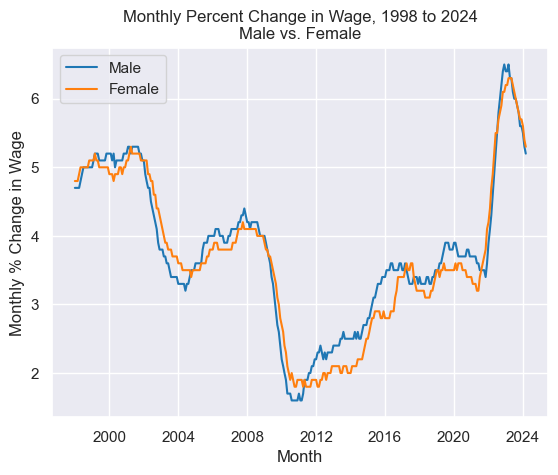

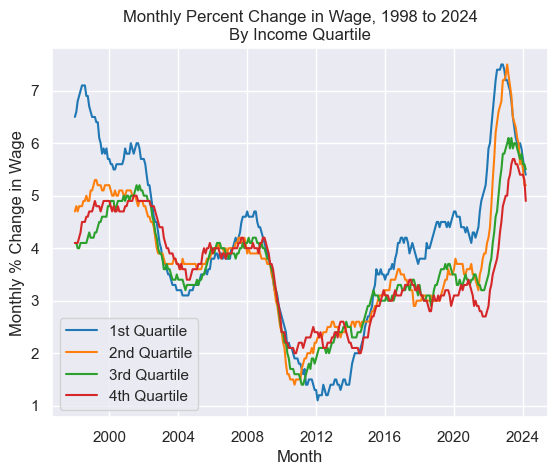

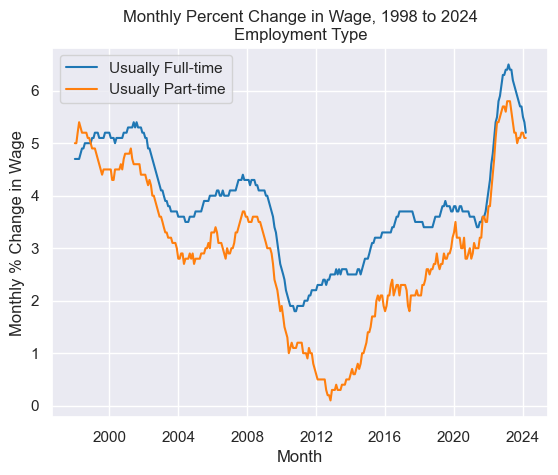

In [55]:
plot_changes_by_groups(finalData) # another context is 'talk' instead of default